In [6]:
# -*- coding: utf-8 -*- Line 2
#----------------------------------------------------------------------------
# Project     : Price Alarm System Enhancement - Alarm3 - Abnormal Price Detection
# Created By  : Eungi Cho
# Created Date: 07/06/22
# Updated Date: 10/06/22
# version ='1.0'
# ---------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
plt.style.use('default')

In [2]:
import pathlib
df_raw = pd.read_csv('/Users/cho-eungi/Practice/CSV/market_entry_price.csv')
df_raw = df_raw.drop_duplicates()
df_raw.head()

,source_id,country,market_id,product_id,entry_id,currency,final_unit,date,price_min,price_max,price_avg
0,201,South Africa,1487,131,92926374,ZAR,kg,2020-07-20,19.64,21.2,19.956
1,39,India,810,490,41039702,INR,kg,2020-07-06,11.80,12.5,12.200
2,41,India,2188,133,50157058,INR,kg,2020-07-06,50.00,52.7,51.400
3,556,Bangladesh,6581,545,84458922,BDT,kg,2020-07-13,4400.00,4800.0,4600.000
4,150,Turkey,2482,126,58387432,TRY,NaN,2020-07-13,10.00,15.0,11.288


In [3]:
entry_lst = np.sort(df_raw['entry_id'].unique())
np.random.seed(0)
sample_entry = np.random.choice(entry_lst, 30)

# test_df = sample_entry dataframe - before time_df join
test_df = df_raw.loc[df_raw['entry_id'].isin(sample_entry)].sort_values(
    by = ['source_id', 'market_id', 'entry_id', 'date']).copy()
test_df['date'] = pd.to_datetime(test_df['date'])
test_df

,source_id,country,market_id,product_id,entry_id,currency,final_unit,date,price_min,price_max,price_avg
10251136,29,United States,329,236,94951352,USD,pound,2020-01-06,40.0,44.00,42.000000
10251137,29,United States,329,236,94951352,USD,pound,2020-01-13,42.0,47.00,44.600000
10174185,29,United States,329,236,94951352,USD,pound,2020-01-20,45.0,46.00,45.500000
10150648,29,United States,329,236,94951352,USD,pound,2020-01-27,40.0,42.00,41.000000
10040211,29,United States,329,236,94951352,USD,pound,2020-02-03,30.0,32.00,31.000000
...,...,...,...,...,...,...,...,...,...,...,...
9617790,640,South Africa,651,230,87911783,ZAR,kg,2021-01-04,17.0,21.37,18.333333
3095063,640,South Africa,1472,129,95577699,ZAR,kg,2021-01-18,60.0,72.22,58.750000
3156010,640,South Africa,1472,129,95577699,ZAR,kg,2021-01-25,60.0,59.23,55.000000
3150005,640,South Africa,1472,129,95577699,ZAR,kg,2022-01-03,75.0,75.00,75.000000


In [4]:
# W-MON date range from 2020 to 2022
# Left Join Test DF and Time DF
empty_df = pd.DataFrame()
for entry in sample_entry:
    entry_start = min(df_raw.loc[df_raw['entry_id'] == entry]['date'])
    date_range = pd.date_range(entry_start, '2022-05-31', freq = 'W-MON')
    time_df = pd.DataFrame({'date': date_range})
    
    time_df['entry_id_'] = entry
    entry_df = test_df.loc[test_df['entry_id'] == entry]
    joined_df = pd.merge(time_df, entry_df, left_on = ['date'], right_on = ['date'], how = 'left')
    empty_df = empty_df.append(joined_df)

empty_df = empty_df.drop(['entry_id'], axis = 1)
df = empty_df.copy()
df = df.sort_values(by = ['entry_id_', 'date'])
df.set_index(np.arange(len(df)), inplace=True)
df

,date,entry_id_,source_id,country,market_id,product_id,currency,final_unit,price_min,price_max,price_avg
0,2020-01-06,40867745,39.0,India,1484.0,206.0,INR,kg,61.75,61.75,61.75
1,2020-01-13,40867745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-20,40867745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,40867745,39.0,India,1484.0,206.0,INR,kg,46.05,51.00,48.50
4,2020-02-03,40867745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2724,2022-05-02,123551904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2725,2022-05-09,123551904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2726,2022-05-16,123551904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2727,2022-05-23,123551904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


number of unique entry_id in df:  30
shape of df:  (2729, 11)
number of null price_avg data in each entry: 


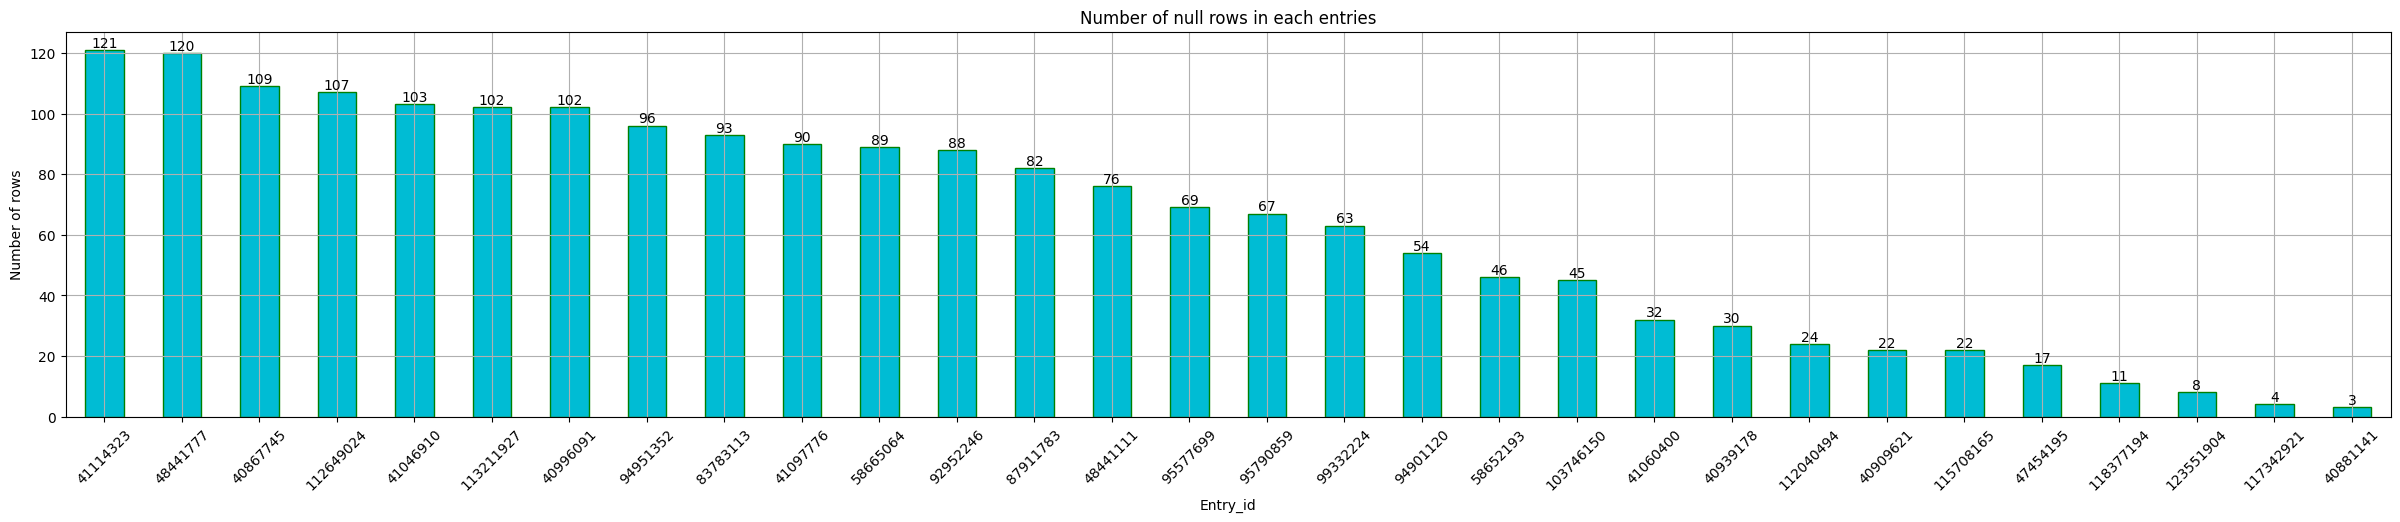

In [7]:
# Initialize a stats dataframe
df_stats = df[['date', 'entry_id_', 'product_id', 'price_avg']]

# Count null rows in each entry
def groupby_count_null(row):
    null_cnt = row.isnull().astype(int).sum()
    return null_cnt

print('number of unique entry_id in df: ', len(df.entry_id_.unique()))
print('shape of df: ', df.shape)
print('number of null price_avg data in each entry: ')

null_cnt_by_entry = df.groupby('entry_id_')['price_avg'].apply(groupby_count_null).sort_values(ascending = False)
ax = null_cnt_by_entry.plot.bar(
    rot = 45, figsize=(30, 5), title='Number of null rows in each entries', 
    fontsize=10, color='#00bcd4', edgecolor='g', linestyle='-', 
    legend=False, grid=True, xlabel='Entry_id', ylabel='Number of rows'
)
ax.bar_label(ax.containers[0])
plt.show()

In [8]:
# Count the number of outliers
def outlier_func(row, sigma=2, window = 4, display_plot = False, used_in_groupby = False):
    row = pd.DataFrame(row)
    # Use moving average by rolling
    average = row.rolling(window = window, min_periods = 1).mean()
    # Standardization of average
    Z = (average - average.mean()) / average.std()
    outlier_lst = []
    for i in range(len(row)):
        if Z.iat[i, 0] > sigma or Z.iat[i, 0] < -sigma:
            outlier_lst.append(row.iat[i, 0])

    if display_plot is True:
        plt.figure(figsize=(30, 6), dpi=80)

        plt.plot((row - row.mean()) / row.std())
        plt.plot(Z)
        plt.plot(Z - sigma, '--', color='#ff0000')
        plt.plot(Z + sigma, '--', color='#ff0000')
        plt.xlabel('Time (weeks)')
        plt.ylabel('Standardized Price')
        plt.title('Outlier detection (sigma=' + str(sigma) + ')')
        plt.legend(['Price', 'Moving average', 'Lower bound', 'Upper bound'])

        plt.show()
    
    if used_in_groupby is True:
        return len(outlier_lst)
    else:
        return outlier_lst

In [9]:
def calculate_volatility(row):
    notnull_row = row.values[~np.isnan(row.values)]
    if len(notnull_row) > 0.5 * len(row):
        chg_rate_lst = [(notnull_row[i] - notnull_row[i-1]) * 100 / notnull_row[i-1] for i in range(1, len(notnull_row))]
        volatility = np.std(chg_rate_lst)
    else:
        volatility = np.nan
    return volatility

volatility_series = df.groupby('entry_id_')['price_avg'].apply(lambda row: calculate_volatility(row))
volatility_series[volatility_series.values == volatility_series.max()]

entry_id_
58652193    97.281056
Name: price_avg, dtype: float64

In [26]:
# Pivot_table
df_pivot = df.pivot_table(['price_avg'], index = ['entry_id_'], columns = ['date'])

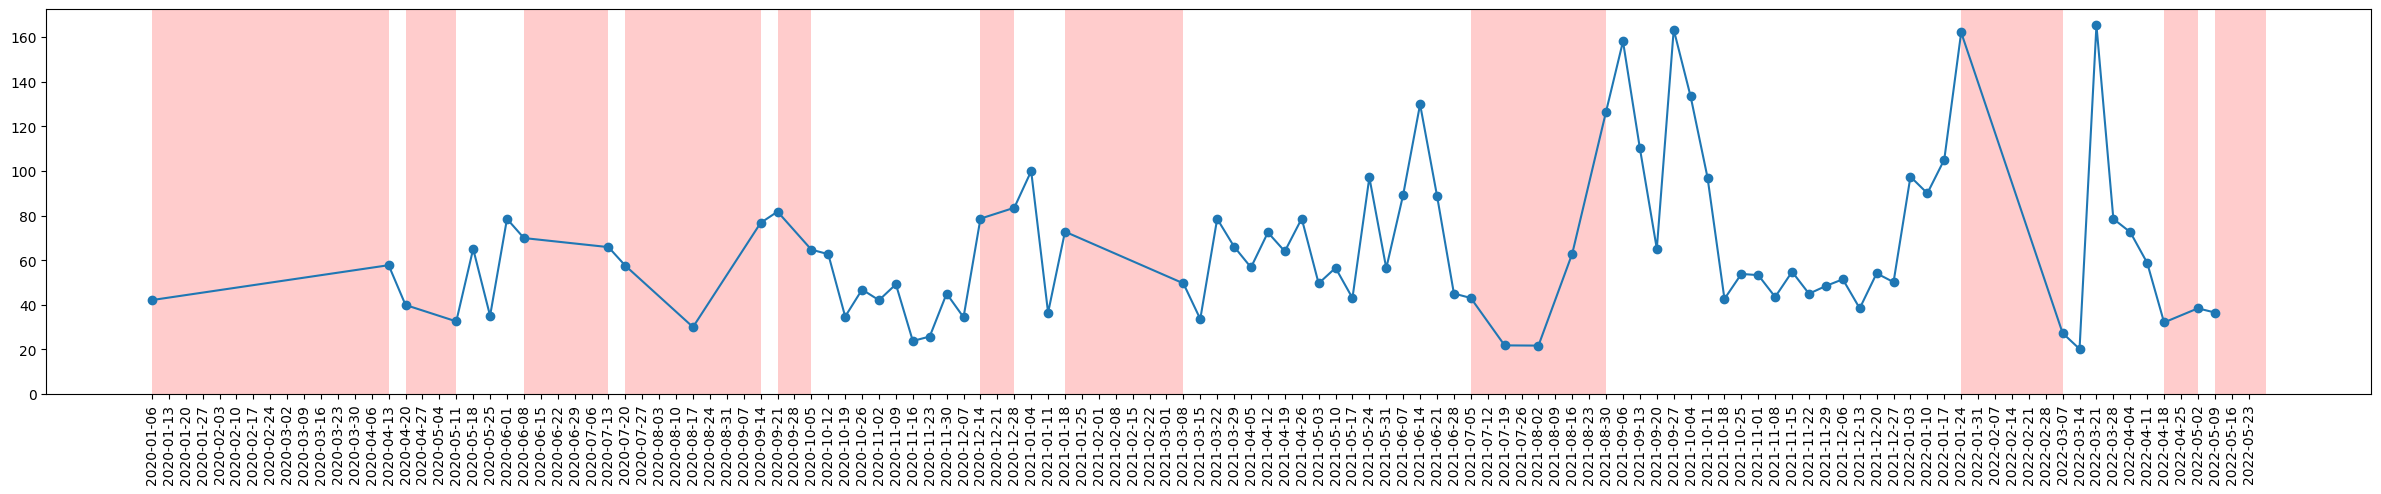

In [27]:
# Define function: Plot sample data with full time period
def plot_sample_with_ft(df_pivot, entry_id):
    # Masking null_value
    sample_entry = df_pivot[df_pivot.index == entry_id].stack(dropna = False).reset_index().drop(['entry_id_'], axis = 1)
    x = sample_entry.date
    y = sample_entry.price_avg.astype(np.double)
    ymask = np.isfinite(y)
    
    plt.figure(figsize = (30, 5))
    plt.plot(x[ymask], y[ymask], linestyle = '-', marker = 'o')
    plt.xticks(sample_entry.date, rotation = 90)
    plt.ylim(bottom = 0)
    
    # axvspan with red color - find index of start & end point of null
    sample_entry = sample_entry.set_index('date')
    is_nan = sample_entry['price_avg'].isna()
    n_groups = is_nan.ne(is_nan.shift()).cumsum()
    gap_list = sample_entry[is_nan].groupby(n_groups).aggregate(
        lambda x: (
            x.index[0] + pd.DateOffset(days=-7),
            x.index[-1] + pd.DateOffset(days=+7)
        )
    )["price_avg"].values
    
    for gap in gap_list:
        plt.axvspan(gap[0], gap[1], facecolor='r', alpha=0.2)
    plt.show()

plot_sample_with_ft(df_pivot = df_pivot, entry_id = 58652193)

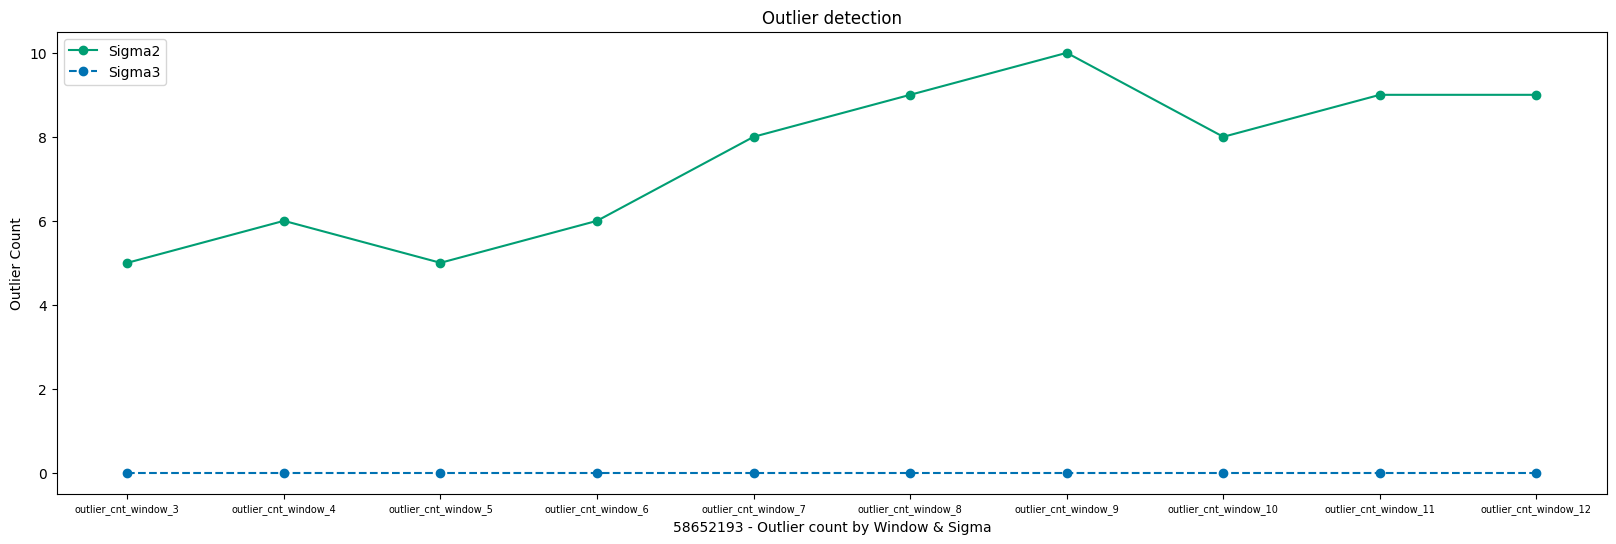

In [28]:
# Plot confidence bands of sample entry
def errorCnt_by_window(df, entry_id, sigma = 2, plot = False):
    # window from 3 to 12 - Count number of outliers
    for window in range(3, 13):
        # sigma = sigma
        df[f'outlier_cnt_window_{window}', f'sigma{sigma}'] = df.apply(lambda row: outlier_func(row.values[~np.isnan(row.values)], used_in_groupby=True, sigma = sigma, window = window), axis = 1)
        # sigma = sigma + 1
        df[f'outlier_cnt_window_{window}', f'sigma{sigma+1}'] = df.apply(lambda row: outlier_func(row.values[~np.isnan(row.values)], used_in_groupby=True, sigma = sigma + 1, window = window), axis = 1)
    if plot:
        sample_df = df[df.index == entry_id]
        # sort_index from window3 to window 12
        sigma_by_window = sample_df.stack(level = 0).iloc[:-1, -2:].droplevel(level = 0)
        sigma_by_window['Window'] = [int(i.split('_')[-1]) for i in sigma_by_window.index]
        sigma_by_window.sort_values(['Window'], ascending = True, inplace = True)
        
        plt.figure(figsize=(20, 6))
        plt.plot(sigma_by_window.index, sigma_by_window['sigma2'], marker = 'o', linestyle = '-', color = '#009E73')
        plt.plot(sigma_by_window.index, sigma_by_window['sigma3'], marker = 'o', linestyle = '--', color = '#0072B2')
        plt.xlabel(f'{entry_id} - Outlier count by Window & Sigma')
        plt.xticks(rotation = 0, fontsize = 7)
        plt.ylabel('Outlier Count')
        plt.title('Outlier detection')
        plt.legend(['Sigma2', 'Sigma3'], loc = 'upper left')
        
        plt.show()
df_pivot_sample = df_pivot.copy()
errorCnt_by_window(df_pivot_sample, entry_id = 58652193, plot = True)

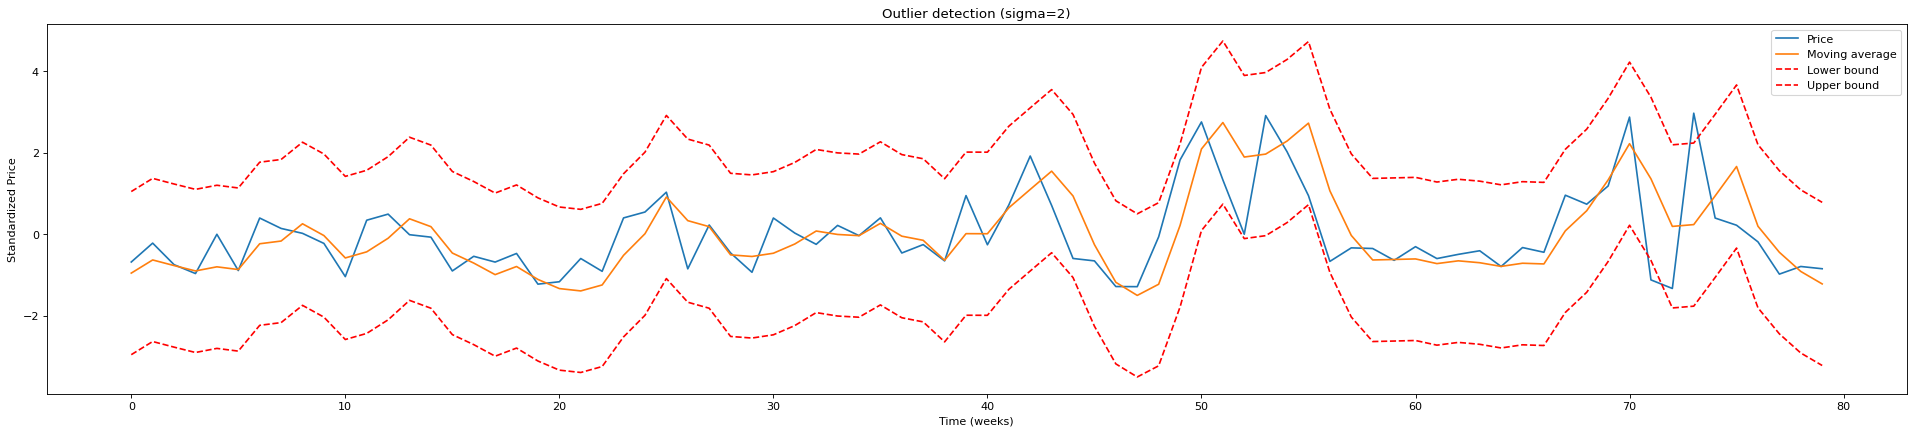

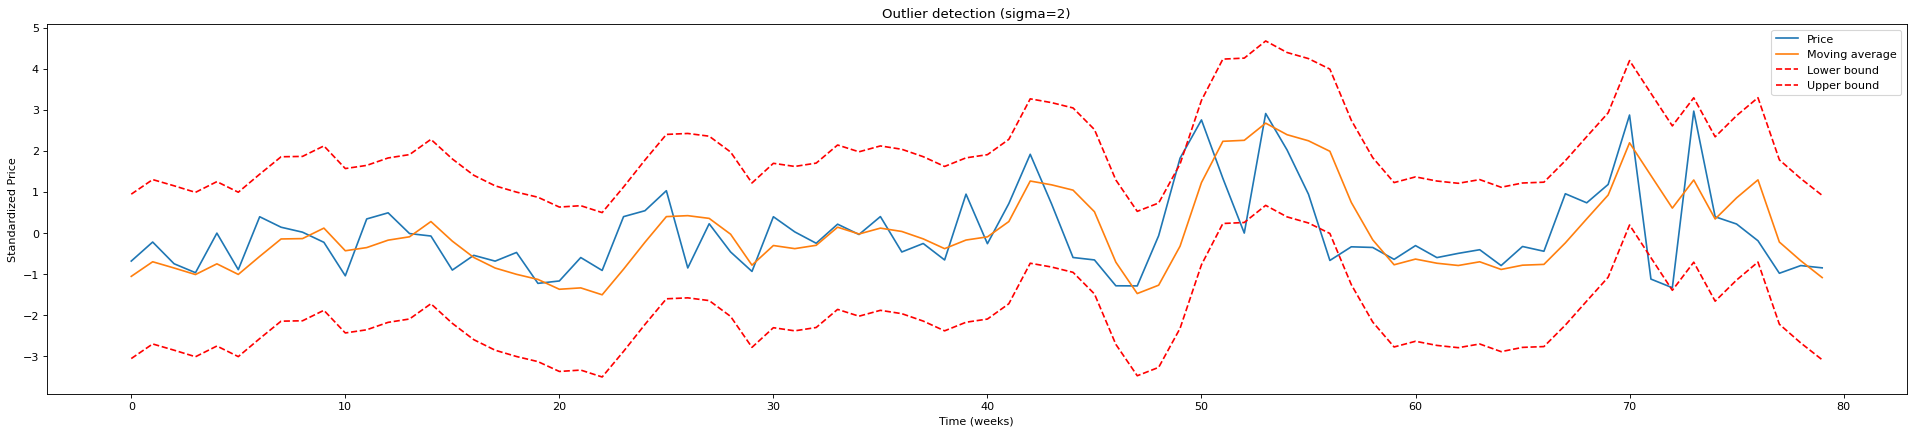

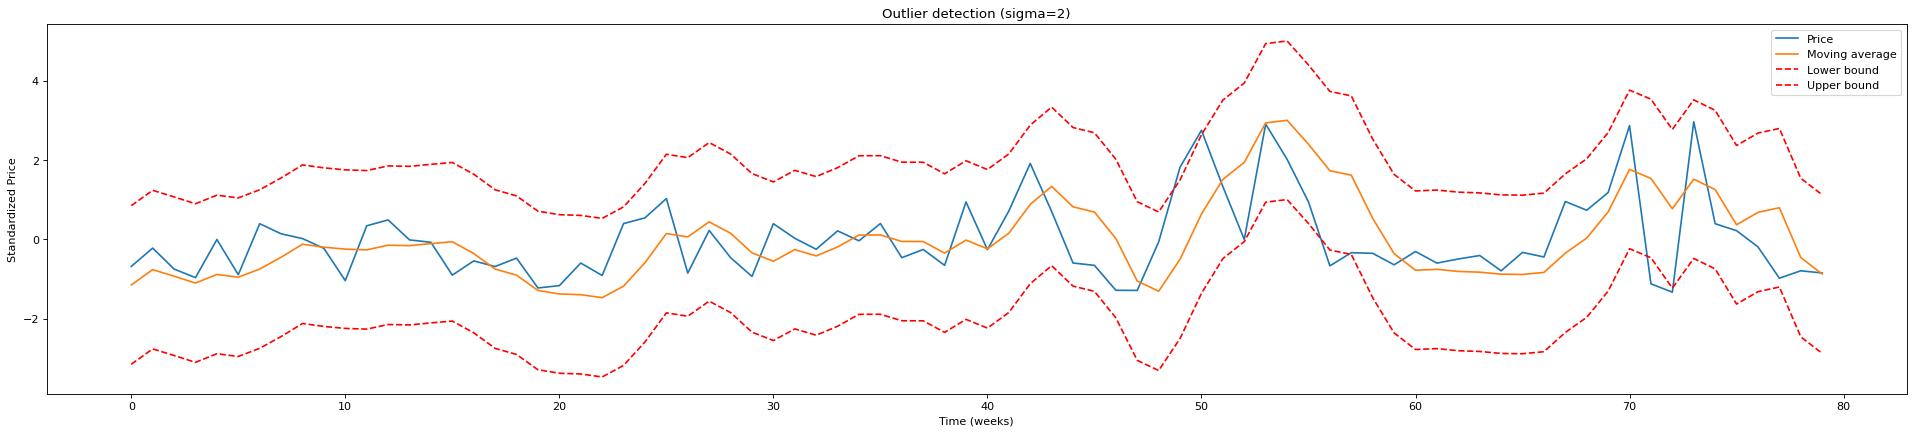

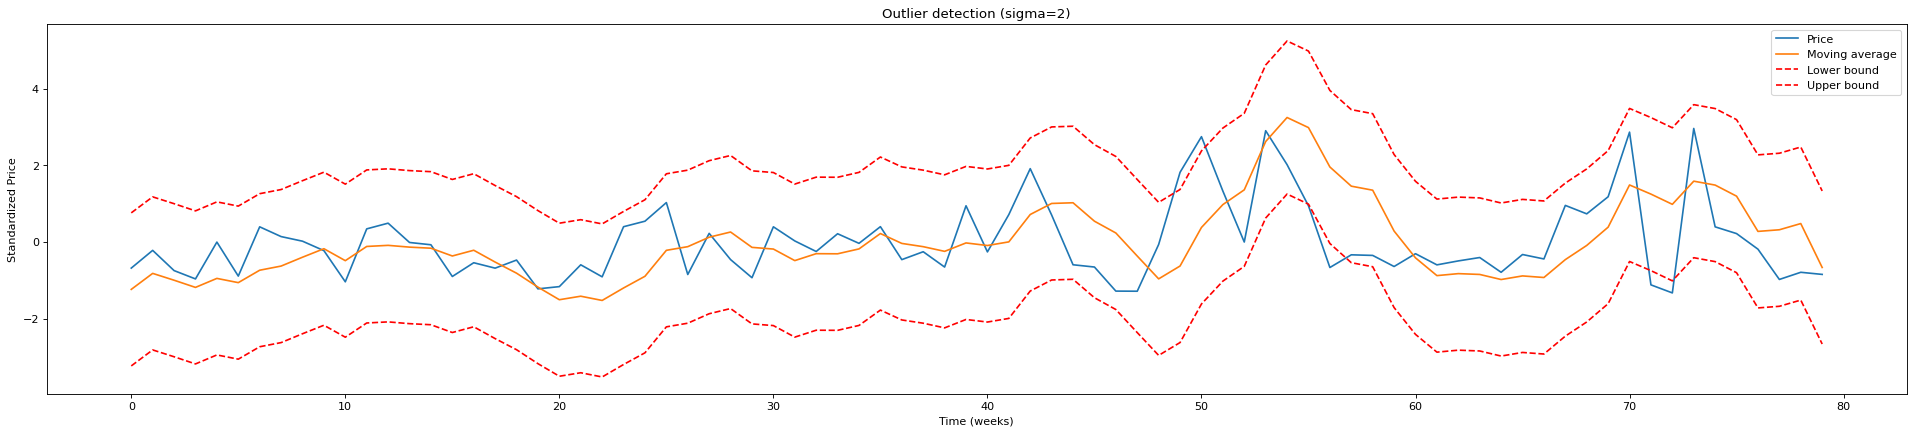

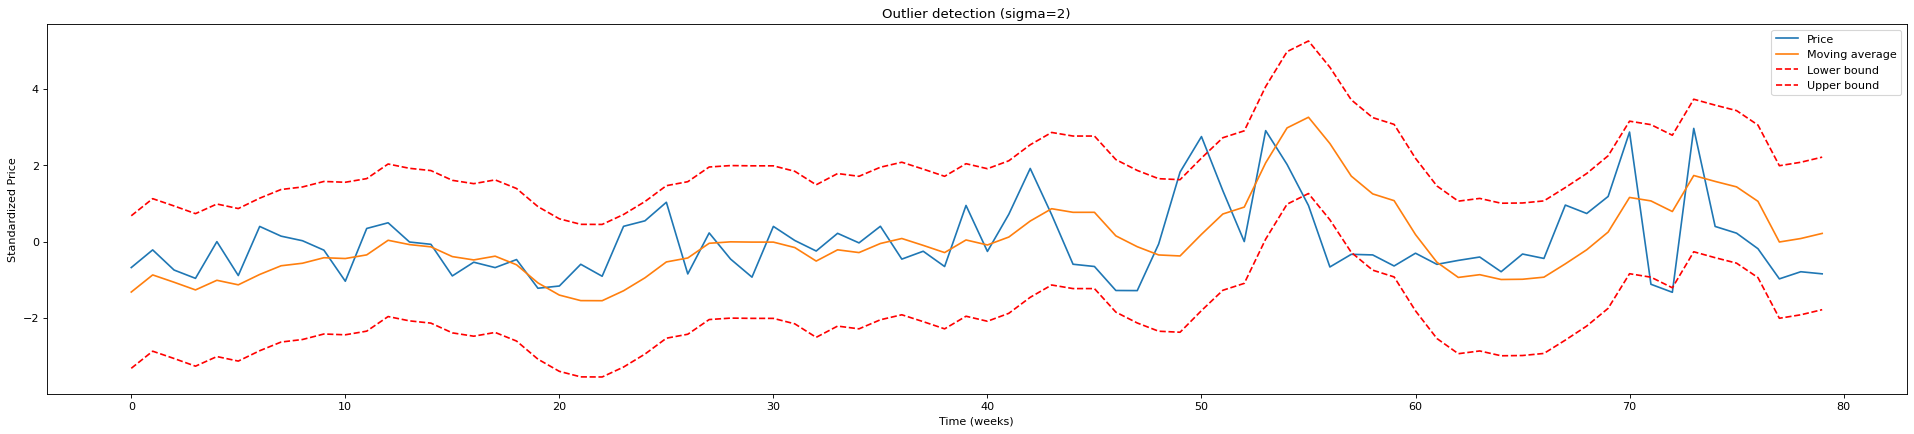

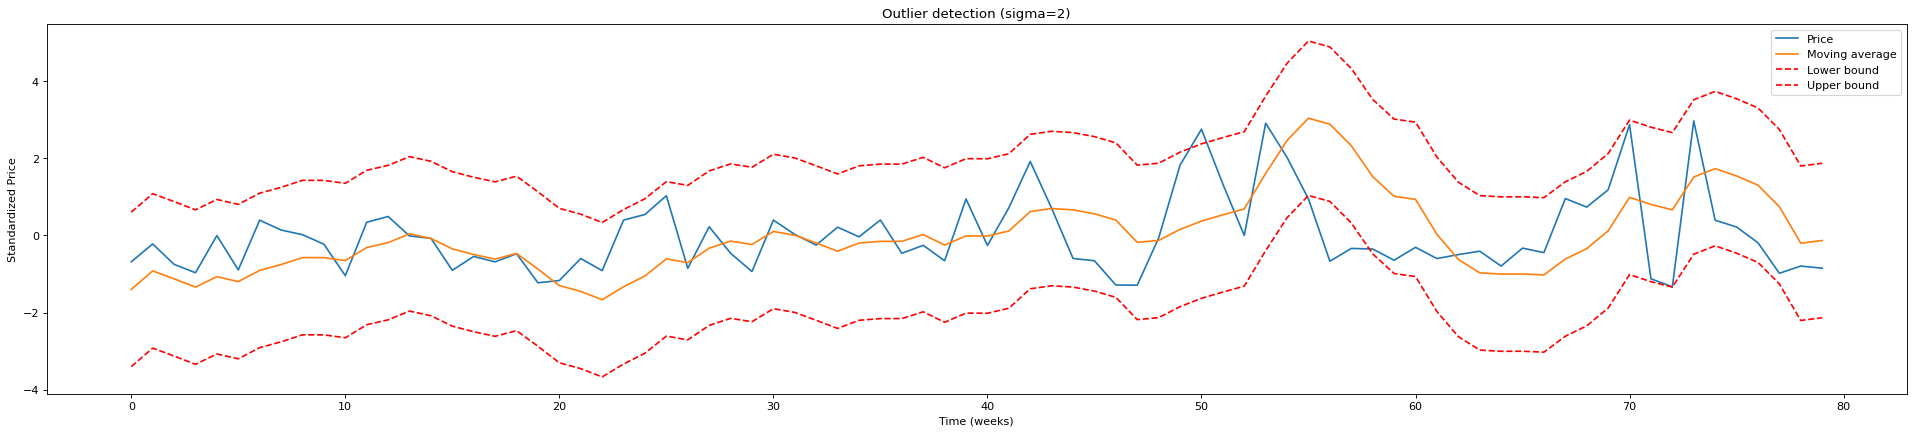

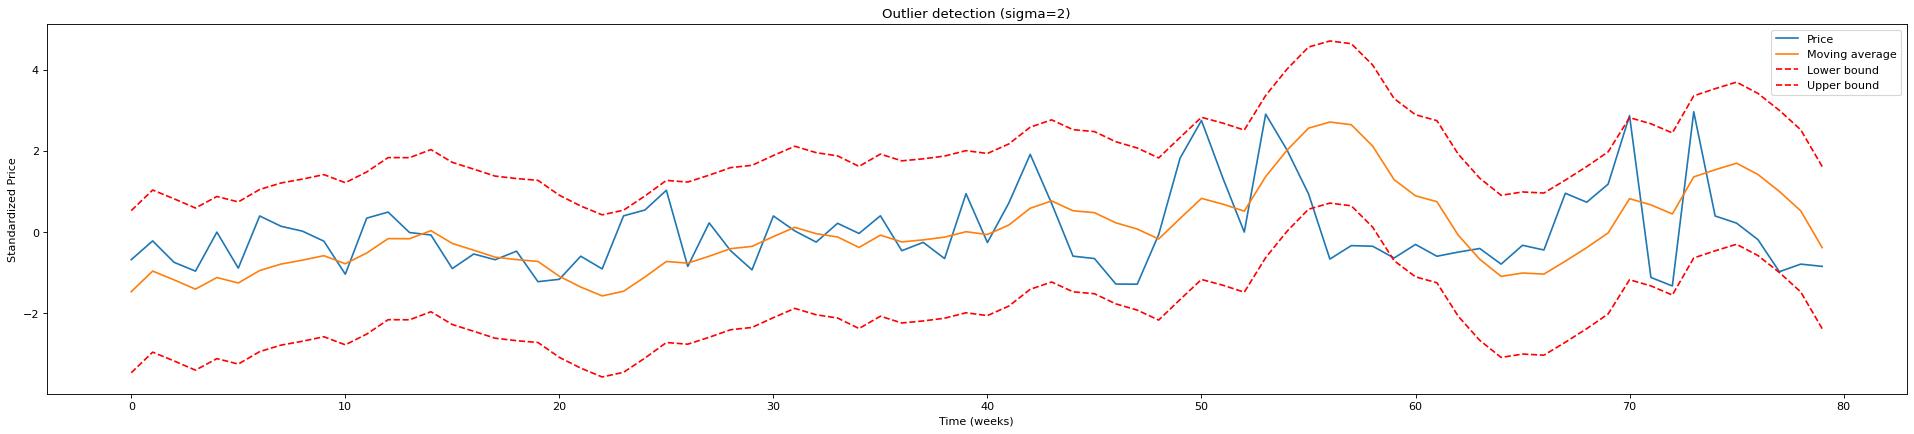

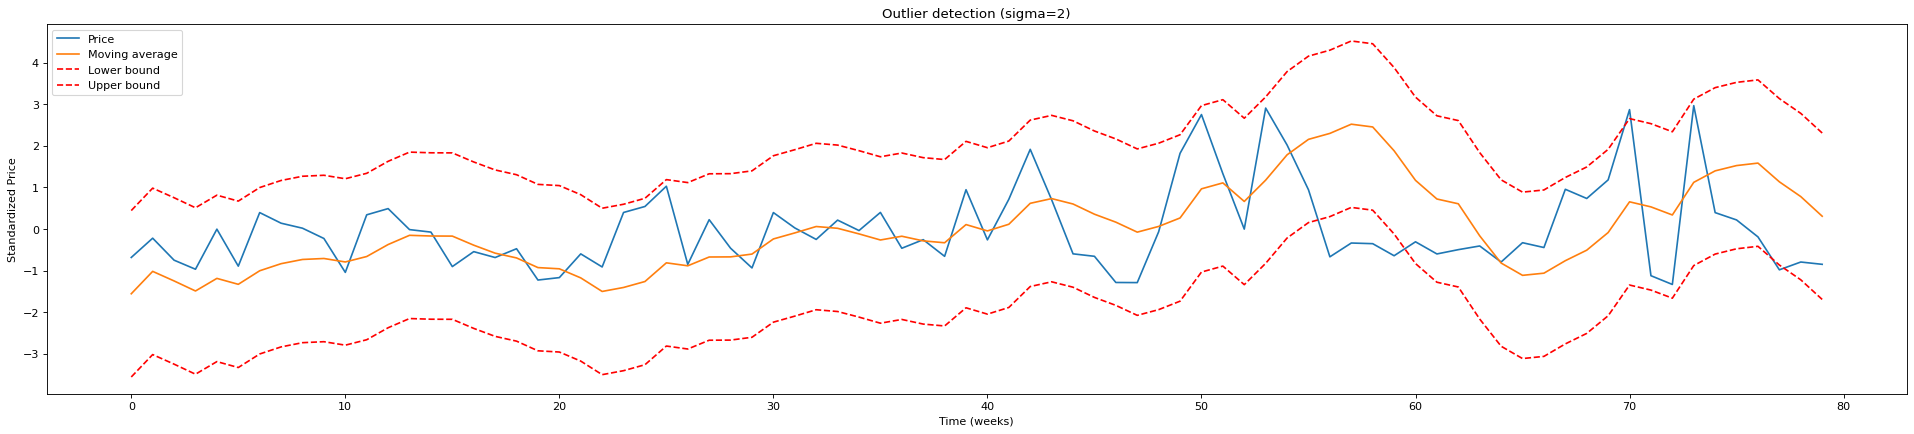

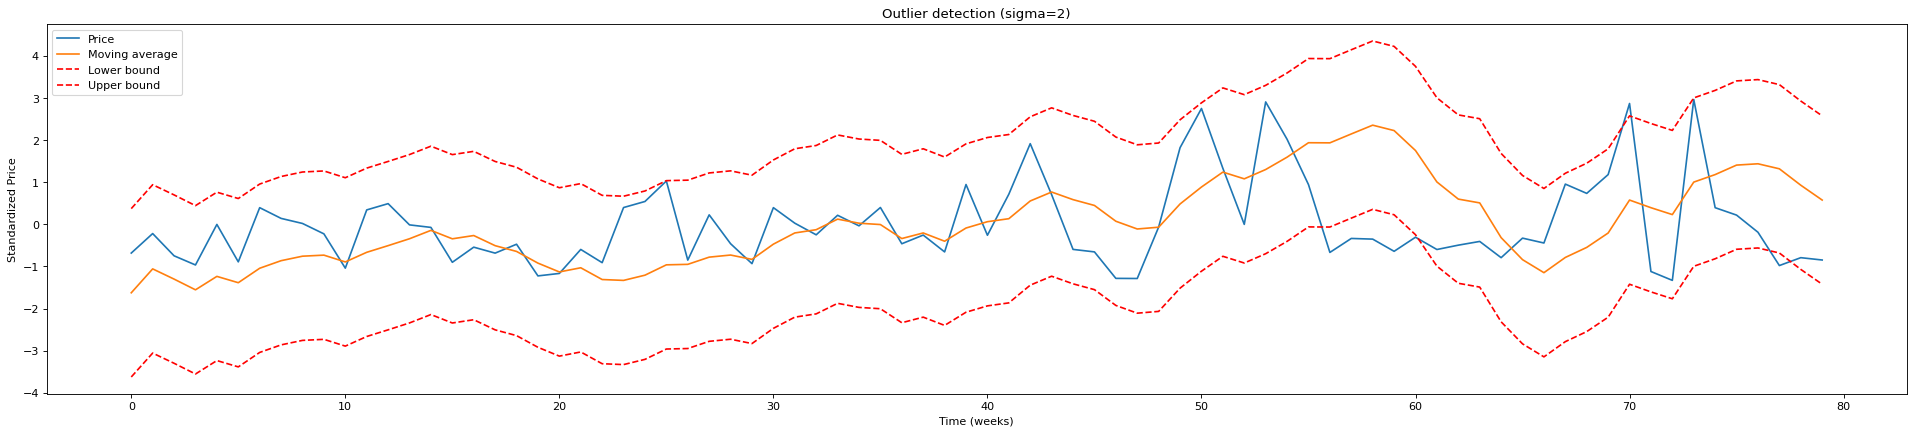

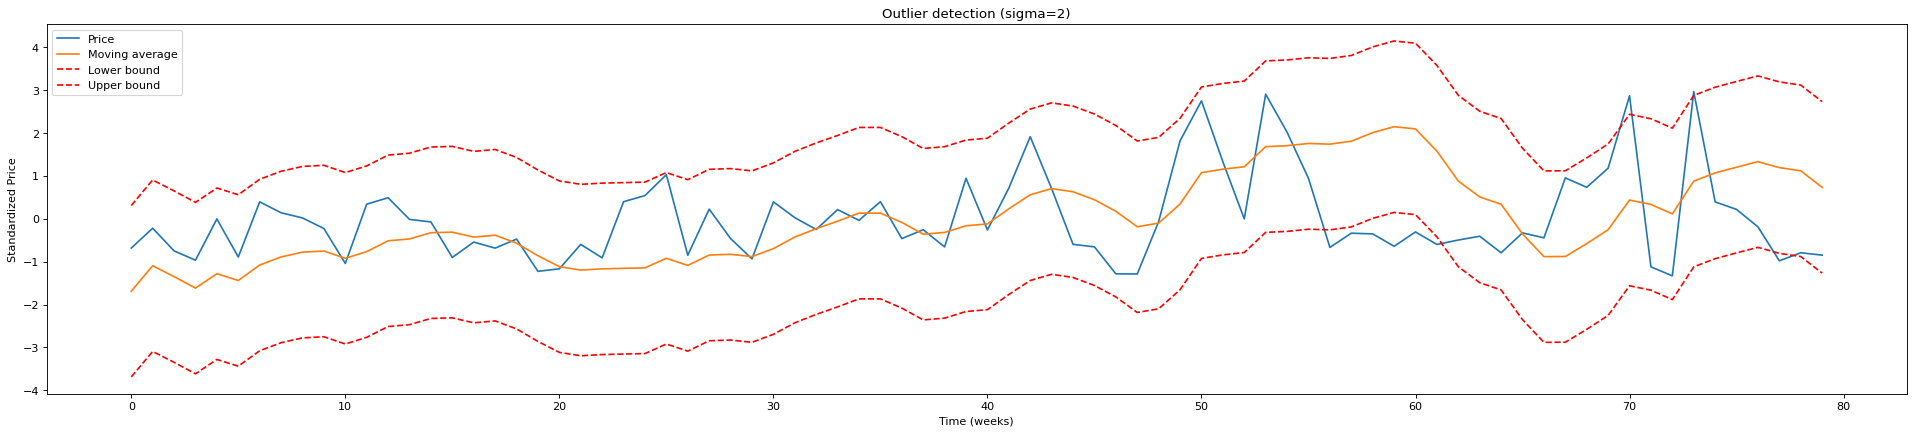

In [34]:
# Count the number of outliers
sample_entry = df_pivot_sample[df_pivot_sample.index == 58652193]['price_avg']
notNanPrice = sample_entry.values[~np.isnan(sample_entry.values)]

for window in range(3, 13):
    outlier_func(notNanPrice, sigma = 2, window = window, display_plot = True)

# Conclusion: Window = 4, sigma = 2
**Reason: Abnormal price would appear when:
1) External environment (e.g. bad weather, world war, shortage in supply)

2) Human mistake - mistakenly input the price data

Suppose that at a certain point (Tn-1), price changes with a huge rate, so the alarm occurs.
It could be the case because of the two reasons above.

Even though there could be some situations when price ups and downs frequently while drawing a huge amplitude, but those are rare. Generally, the changed price would maintain for a certain period of time (although there might be a slight change).

But, if we increase the window, then the detection bands would be too "flattend".
It will cause mainly two kind of problems as described below:
1) too flattened to detect the abnormalility.

2) detect again the next price ("Tn") and raise an alarm even it is plausible throughout the context. It is proved from the gragh above ("number of Outlier deteciton") that the number of alarms increase proportionally with size of the window.

# Compare new detection logic with as-is logic

In [66]:
# As-is Logic - Change rate > 200 %, then raise an alarm
def as_is_alarm(row, display_plot = False):
    # As-is alarm 1
    outlier_dic = {'alarm1': [], 'alarm2': []}
    
    for i in range(1, len(row)):
        chg_rate = (row[i] - row[i-1]) / row[i-1]
        if chg_rate > 2:
            outlier_dic['alarm1'].append(row[i])  

    # As-is alarm 2
    average = row.mean()
    threshold_min = average - 2 * np.std(row)
    threshold_max = average + 2 * np.std(row)
    if threshold_min < 0:
        threshold_min = 0

    for i in row:
        if i < threshold_min or i > threshold_max:
            outlier_dic['alarm2'].append(i)
    
    if display_plot is True:
        plt.figure(figsize = (20, 5))
        
        plt.plot(row)
        plt.plot([0, len(row)], [average, average], '-')
        plt.plot([0, len(row)], [threshold_min, threshold_min], '--', color='#ff0000')
        plt.plot([0, len(row)], [threshold_max, threshold_max], '--', color='#ff0000')
            
        plt.xlabel('Time (weeks)')
        plt.ylabel('Price')
        plt.legend(['Price', 'Average', 'Lower bound', 'Upper bound'], loc = 'upper left')    
        
        plt.show()
    
    alarm1_set = set(outlier_dic['alarm1'])
    alarm2_set = set(outlier_dic['alarm2'])
    detected_set = alarm1_set.union(alarm2_set)
    
    return detected_set

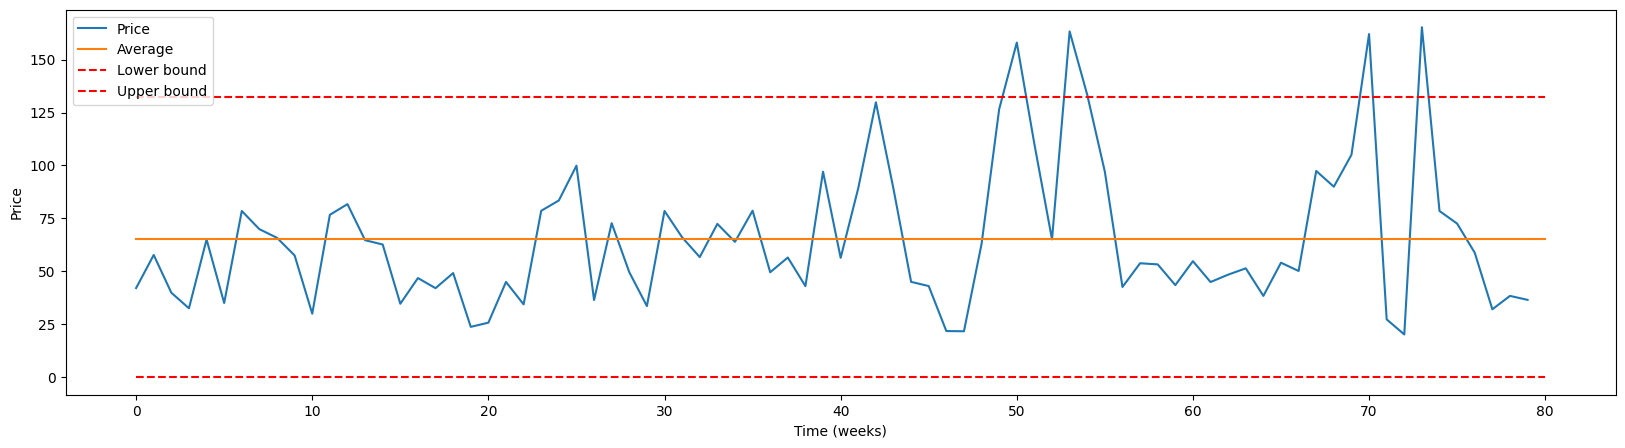

[133.34, 158.0333333333, 162.05, 163.3, 165.2750015259]

In [67]:
as_is_detected = as_is_alarm(notNanPrice, display_plot = True)
sorted(as_is_detected)

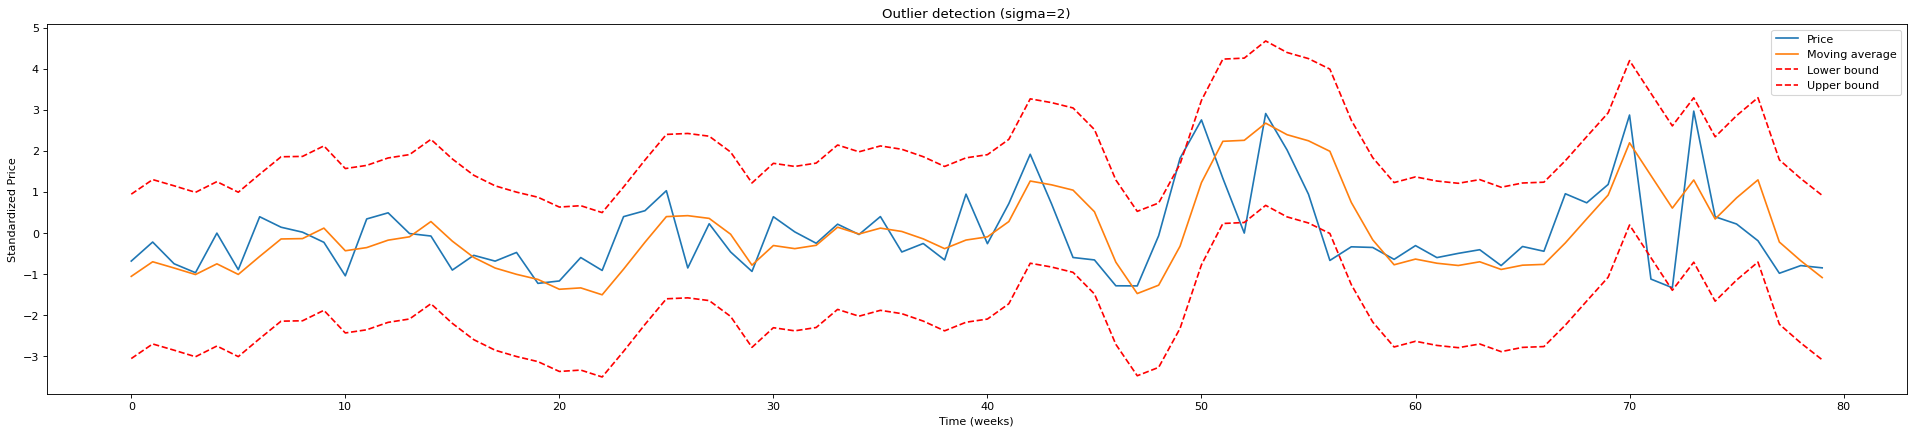

[65.1, 97.0, 110.06, 133.34, 162.05, 163.3]

In [56]:
newly_detected = set(outlier_func(notNanPrice, window = 4, sigma = 2, display_plot = True))
sorted(newly_detected)